<a href="https://colab.research.google.com/github/Gabriel-MR/openstreatmap/blob/main/openstreatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T1
Este projeto tem como objetivo utilizar heurísticas para o cálculo de uma rota entre dois pontos utlizando openstreatmap.
<br>
A origem e o destino serão inputável.
<br>
Para mostrar o funcionamento foi utilizado o Instituto Mauá de Tecnologia como origem e o Shopping Park São Caetano como destino.
<br>
A rota é gerada e os nós do grafo e suas coordenadas correspondentes são printadas na tela, além de gerar um mapa destacando a rota calculada.

# Bibliotecas

In [ ]:
!pip install -q osmnx==1.2.2
!pip install -q shapely==1.8
!pip install -q networkx==3.0


# Métodos

In [ ]:
import osmnx as ox
import heapq
import math
import matplotlib.pyplot as plt

'''
Método que gera um grafo a partir de uma coordenada referência
'''
def get_graph_by_center_point(center_point, dist, network_type='drive',
                              simplify=True):
  return ox.graph_from_point(center_point=center_point, dist=dist,
                             network_type=network_type, simplify=simplify)

'''
Método que estima o custo do caminho restante utilizando heurística
'''
def heuristic(neighbor, target):
  return math.sqrt((neighbor['x'] - target['x']) ** 2 +
                    (neighbor['y'] - target['y']) ** 2)

'''
Método que retorna uma lista com o caminho mais curto com base em um MultiGraph
'''
def astar_path(graph, source, target):
  queue = [(0, source, [])]
  visited = set()

  while queue:
      (cost, current, path) = heapq.heappop(queue)

      if current in visited:
          continue

      path = path + [current]

      if current == target:
          return path

      visited.add(current)

      for neighbor, data in graph[current].items():
          neighbor_cost = cost + data.get('weight', 1)
          neighbor_path = path[:]

          if neighbor in visited:
              continue

          neighbor_heuristic = heuristic(graph.nodes[neighbor],
                                         graph.nodes[target])

          total_cost = neighbor_cost + neighbor_heuristic
          heapq.heappush(queue, (total_cost, neighbor, neighbor_path))

  return None

'''
Método que calcula a distância entre dois ponto de latitude e longitude em
metros
'''
def distance_from_coordinates(origin, destiny):
    lat1, lon1 = origin['latitude'], origin['longitude']
    lat2, lon2 = destiny['latitude'], destiny['longitude']
    radius = 6371  # earth radius in km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    # acréscimo de 10% no valor para ter uma margem de borda no mapa
    d = int(radius * c * 1000 * 1.1) 

    return d

'''
Método que converte coordenadas(latitude, longitude) para nó de um grafo
'''
def coordinates_to_nodes(graph, longitude, latitude):
  return ox.nearest_nodes(graph, latitude, longitude)

'''
Método que converte nó de um grafo para coordenadas (latitude, longitude)
'''
def nodes_to_coordinates(route, nodes):
  coordinates = []
  for node in route:
      coordinates.append((nodes[node]['x'], nodes[node]['y']))
  return coordinates

'''
Método que plota o mapa com base no grafo e a rota calculada
'''
def plot_route(graph, route, route_color='r', node_size=0):
  fig, ax = ox.plot_graph_route(graph, route, route_color=route_color,
                                node_size=node_size)
  plt.show()


# Main

In [ ]:
# Coordenadas baseadas no Google Maps
## Instituto Maua de Tecnologia
origin = {
    'latitude': -23.647554020225876,
    'longitude': -46.57217977415457
}

# ## Shopping Park São Caetano
# destiny = {
#     'latitude': -23.625442027792158,
#     'longitude': -46.57983903901164
# }

### Teatro Lauro Gomes
destiny = {
    'latitude': -23.652059955413925,
    'longitude': -46.570529870768446
}

Route node: 1439652924 -> Coordinate: (-46.5715077, -23.6480578)
Route node: 3767628124 -> Coordinate: (-46.5718295, -23.6492544)
Route node: 3767628127 -> Coordinate: (-46.5718141, -23.6494341)
Route node: 1407216773 -> Coordinate: (-46.5711195, -23.6491394)
Route node: 1408754696 -> Coordinate: (-46.5705531, -23.649165)
Route node: 1420113235 -> Coordinate: (-46.5706279, -23.6494966)
Route node: 1420113228 -> Coordinate: (-46.570781, -23.6502956)
Route node: 1420113300 -> Coordinate: (-46.5709788, -23.6510832)
Route node: 1420137662 -> Coordinate: (-46.5703429, -23.6510706)
Route node: 1420113273 -> Coordinate: (-46.5705828, -23.6522031)


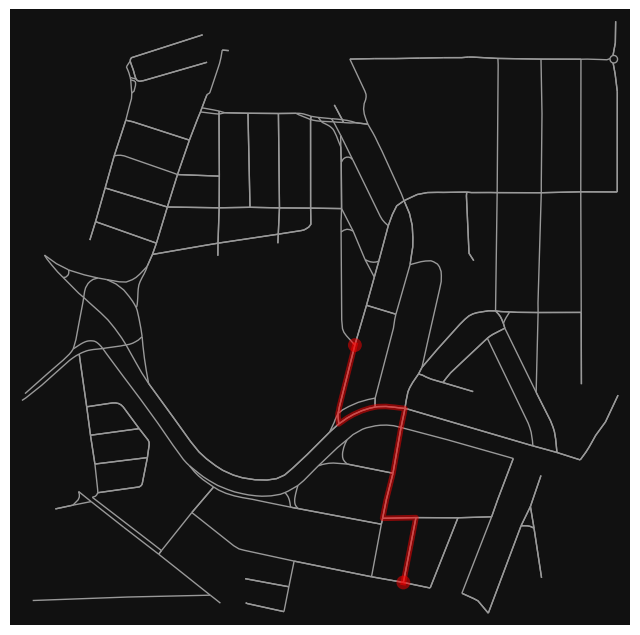

In [ ]:
# @markdown Executa os métodos - integração
dist = distance_from_coordinates(origin=origin, destiny=destiny)

graph = get_graph_by_center_point(
    center_point=(origin['latitude'], origin['longitude']), dist=dist)

start_node = coordinates_to_nodes(graph, origin['latitude'],
                                  origin['longitude'])
end_node = coordinates_to_nodes(graph, destiny['latitude'],
                                destiny['longitude']) 

route_nodes = astar_path(graph, start_node, end_node)
coordinates = nodes_to_coordinates(route_nodes, graph.nodes)

for i in range (len(route_nodes)):
  print(f'Route node: {route_nodes[i]} -> Coordinate: {coordinates[i]}')

plot_route(graph, route_nodes)
